# Real Estate Price Prediction

## Import the python Libraries

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load your dataset

In [126]:
df = pd.read_csv("C:/Users/deepa/Downloads/Real_Estate.csv")  

In [127]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [128]:
print("Dataset Shape:", df.shape)

Dataset Shape: (414, 7)


In [129]:
print("\nColumns in the dataset:", df.columns.tolist())


Columns in the dataset: ['Transaction date', 'House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude', 'House price of unit area']


## Data types of columns

In [131]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Transaction date                        object
House age                              float64
Distance to the nearest MRT station    float64
Number of convenience stores             int64
Latitude                               float64
Longitude                              float64
House price of unit area               float64
dtype: object


## Check for missing values

In [133]:
print(df.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [134]:
print(df.describe())

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

## Visualize price distribution

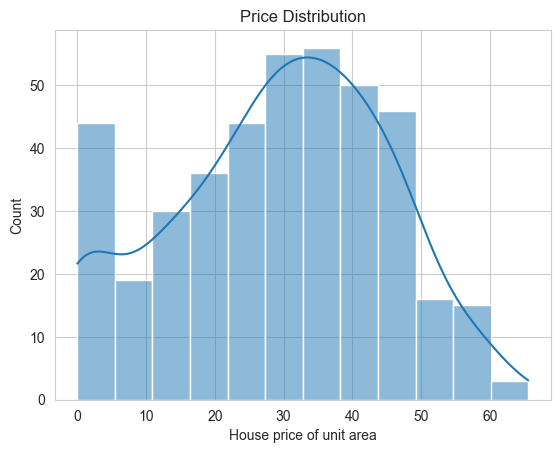

In [136]:
sns.histplot(df['House price of unit area'], kde=True)
plt.title('Price Distribution')
plt.show()

## Distance vs Number of Convenience stores

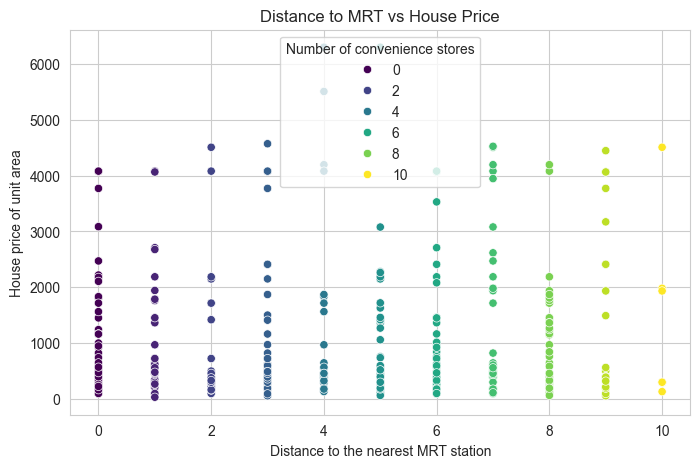

In [137]:
# Scatter plot:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Number of convenience stores',
    y='Distance to the nearest MRT station',
    data=df,
    hue='Number of convenience stores',
    palette='viridis'
)
plt.title('Distance to MRT vs House Price')
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House price of unit area')
plt.show()

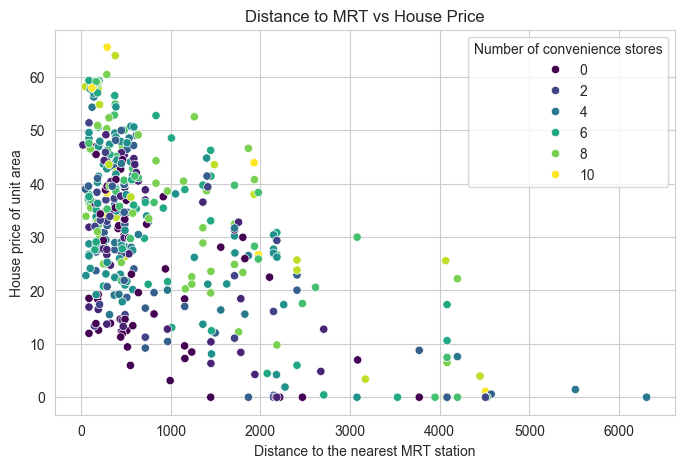

In [138]:
# Scatter plot: Distance vs NUmber of Convenience stores
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Distance to the nearest MRT station',
    y='House price of unit area',
    data=df,
    hue='Number of convenience stores',
    palette='viridis'
)
plt.title('Distance to MRT vs House Price')
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House price of unit area')
plt.show()

## Check for outliers using boxplot

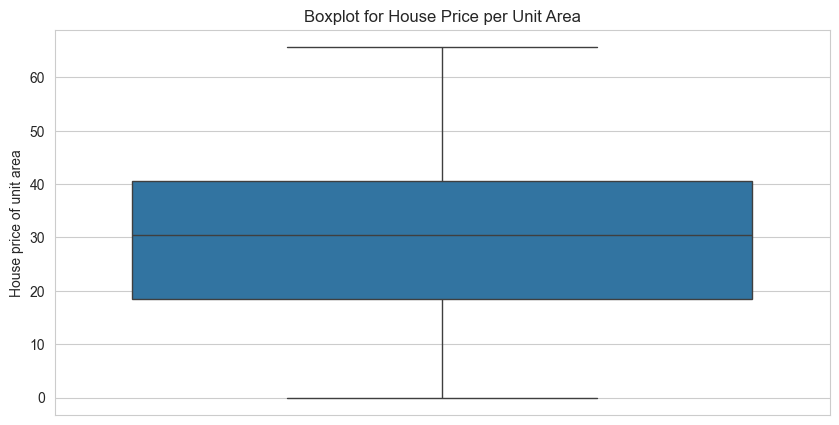

In [140]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['House price of unit area'])
plt.title('Boxplot for House Price per Unit Area')
plt.show()

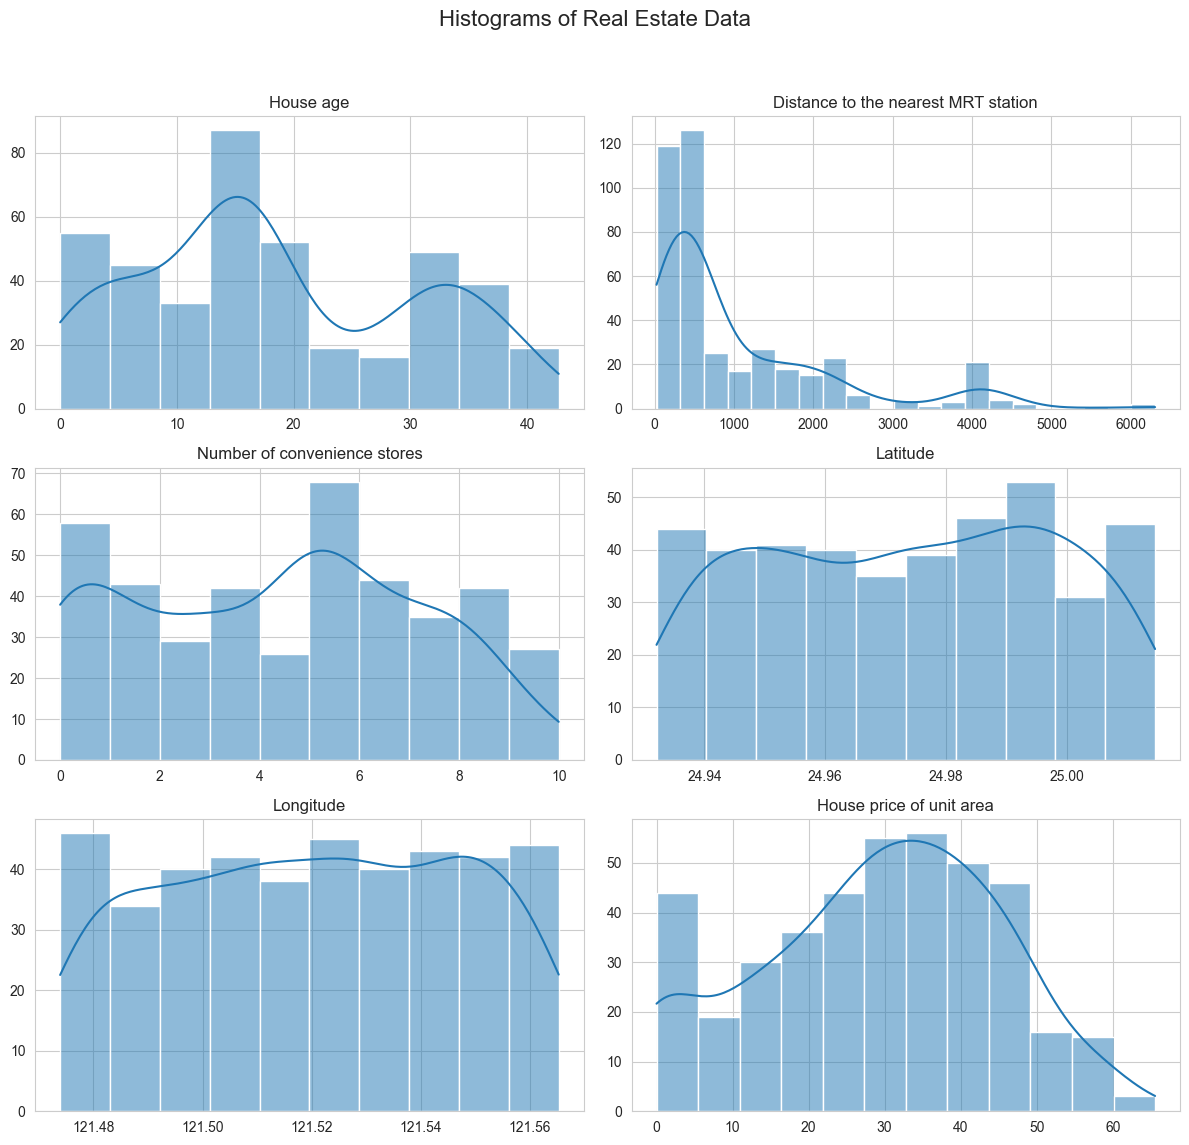

In [141]:
import seaborn as sns

sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Scatter plots to observe the relationship with house price

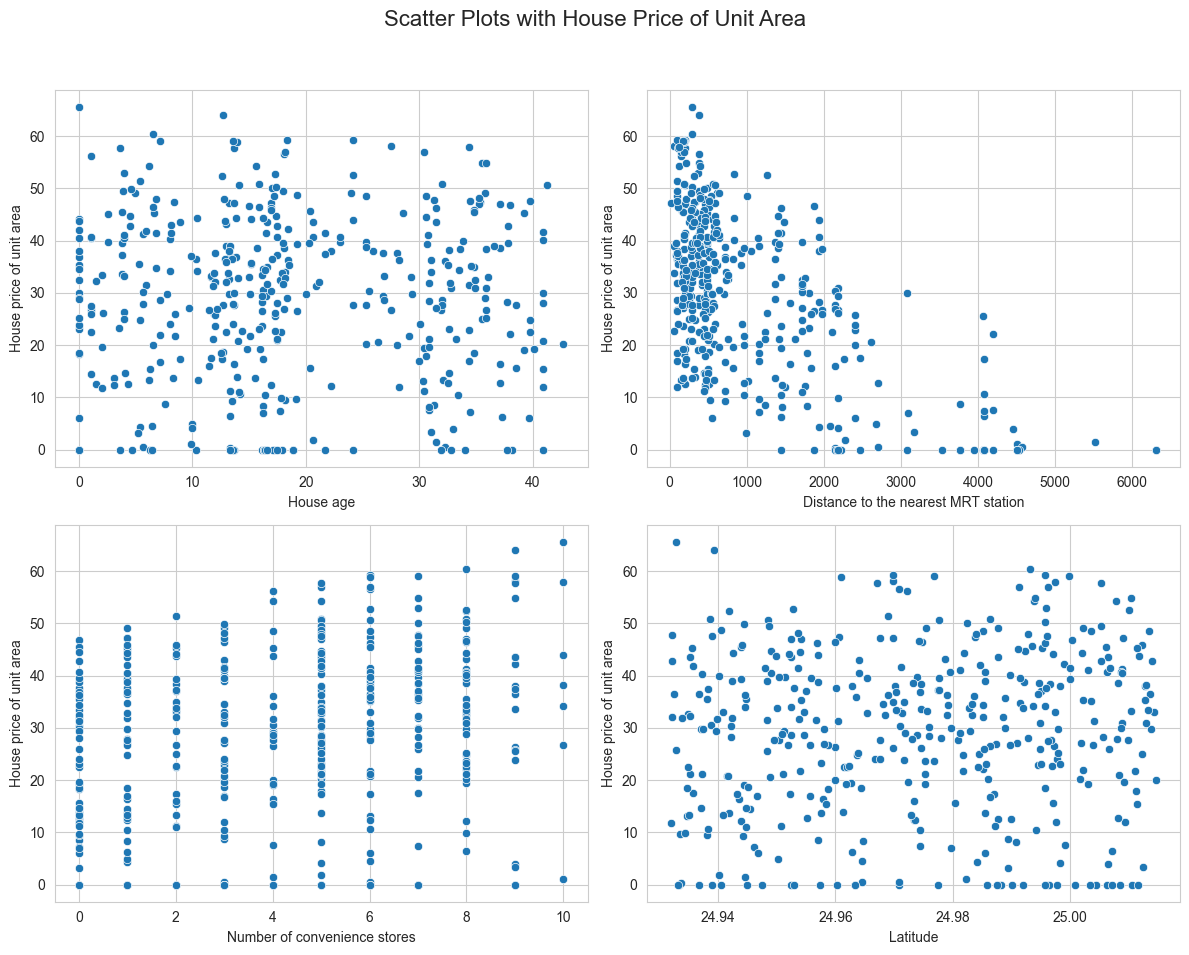

In [143]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=df, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=df, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=df, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=df, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##  Handle missing values (drop rows with missing data for simplicity)

In [145]:
data = df.dropna()

## Data preprocessing for visualization

In [147]:
numeric_df = df.select_dtypes(include=[np.number])

## correlation matrix using only numeric columns

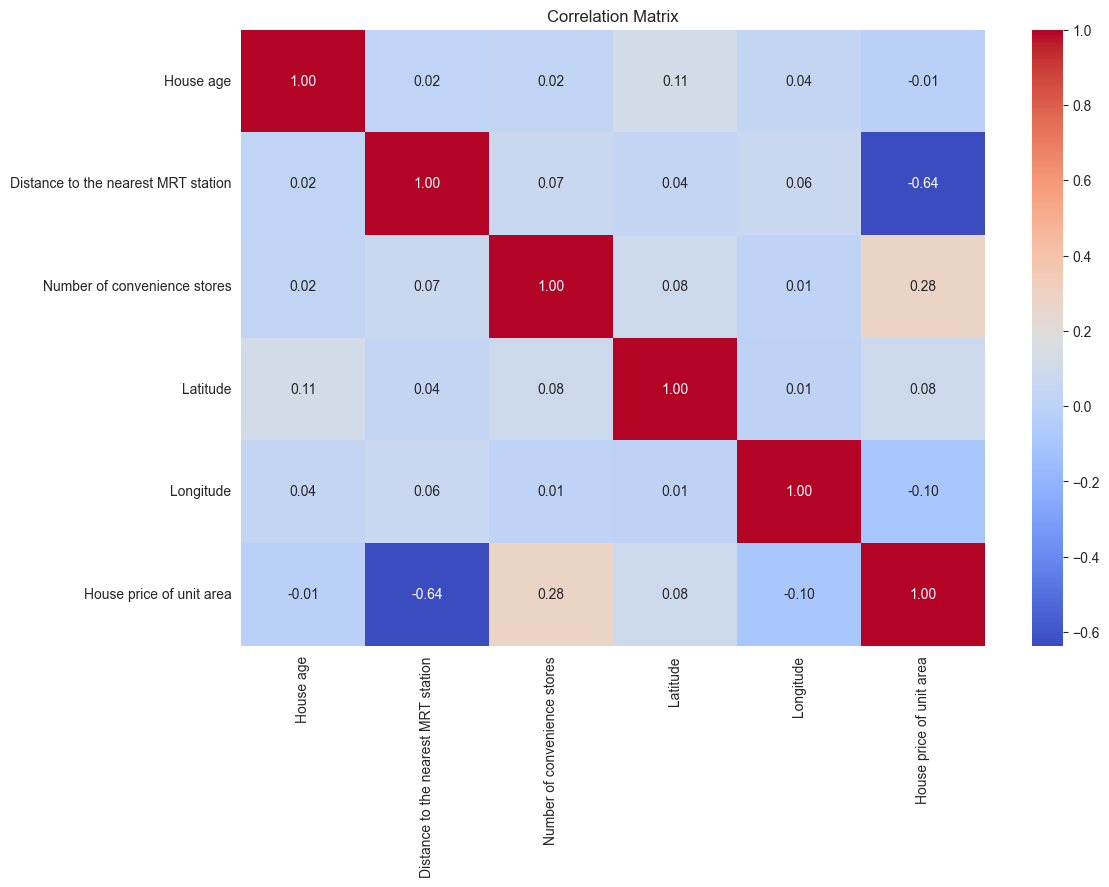

In [149]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##  Distribution of target variable (assuming 'House price of unit area' is the target)

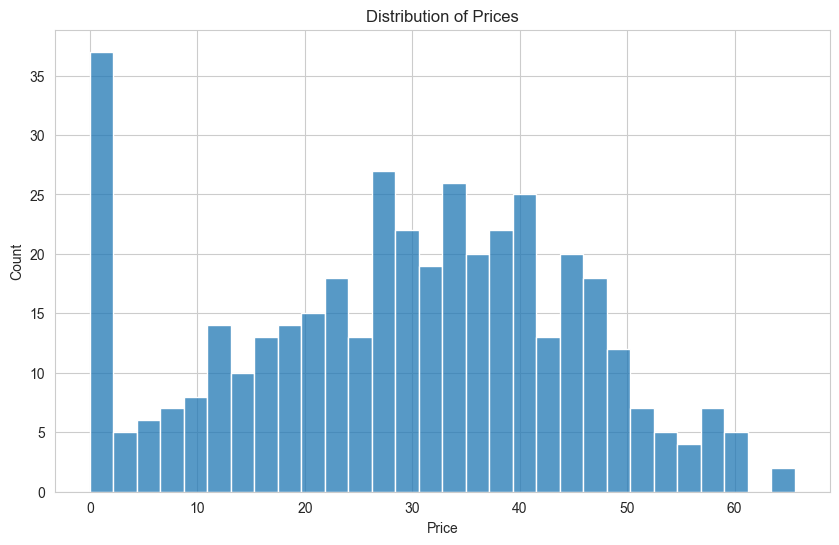

In [151]:
plt.figure(figsize=(10, 6))
sns.histplot(numeric_df['House price of unit area'], bins=30)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

## Create a new feature (price per square foot)

In [153]:
df['price_per_sqft'] = df['House price of unit area'] / df['House age']

## Let's also see what columns we have in our dataset

In [155]:
print("\nAll columns in dataset:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")


All columns in dataset:
Transaction date: object
House age: float64
Distance to the nearest MRT station: float64
Number of convenience stores: int64
Latitude: float64
Longitude: float64
House price of unit area: float64
price_per_sqft: float64


In [156]:
def preprocess_data(df):
    
    df_processed = df.copy()
    
    # Identify numeric and categorical columns
    numeric_columns = df_processed.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = df_processed.select_dtypes(include=['object']).columns
    
    # Handle missing values in numeric columns
    for column in numeric_columns:
        df_processed[column] = df_processed[column].fillna(df_processed[column].mean())
    
    # Handle missing values and encode categorical columns
    for column in categorical_columns:
        df_processed[column] = df_processed[column].fillna(df_processed[column].mode()[0])
        df_processed = pd.get_dummies(df_processed, columns=[column])
    
    return df_processed

# Preprocess the data
df_processed = preprocess_data(df)
print("Processed Dataset Shape:", df_processed.shape)
print("\nProcessed Columns:", df_processed.columns.tolist())

Processed Dataset Shape: (414, 421)

Processed Columns: ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude', 'House price of unit area', 'price_per_sqft', 'Transaction date_2012-09-02 16:42:30.519336', 'Transaction date_2012-09-04 22:52:29.919544', 'Transaction date_2012-09-05 01:10:52.349449', 'Transaction date_2012-09-05 13:26:01.189083', 'Transaction date_2012-09-06 08:29:47.910523', 'Transaction date_2012-09-06 14:18:34.142030', 'Transaction date_2012-09-06 15:07:23.396013', 'Transaction date_2012-09-07 07:57:25.291322', 'Transaction date_2012-09-07 10:06:48.384148', 'Transaction date_2012-09-07 13:21:33.254701', 'Transaction date_2012-09-07 20:42:58.363599', 'Transaction date_2012-09-07 21:36:29.294109', 'Transaction date_2012-09-08 01:05:20.095597', 'Transaction date_2012-09-09 09:29:47.768544', 'Transaction date_2012-09-09 17:24:50.129628', 'Transaction date_2012-09-11 19:06:31.002528', 'Transaction date_2012-09-12 05:03:0

## Split data into train and test sets

In [158]:
# Check for NaN values
print("Number of NaN values in each column:")
print(X.isnull().sum())

# Check for Infinity values
print("\nNumber of Infinity values in each column:")
print((X == np.inf).sum() + (X == -np.inf).sum())


Number of NaN values in each column:
House age                                      0
Distance to the nearest MRT station            0
Number of convenience stores                   0
Latitude                                       0
Longitude                                      0
                                              ..
Transaction date_2013-07-25 15:30:36.565239    0
Transaction date_2013-07-26 17:16:34.019780    0
Transaction date_2013-07-28 21:47:23.339050    0
Transaction date_2013-07-29 13:33:29.405317    0
Transaction date_2013-08-01 09:49:41.506402    0
Length: 420, dtype: int64

Number of Infinity values in each column:
House age                                      0
Distance to the nearest MRT station            0
Number of convenience stores                   0
Latitude                                       0
Longitude                                      0
                                              ..
Transaction date_2013-07-25 15:30:36.565239    0
Transaction 

In [159]:
# Replace NaN with the mean of the respective column
X = X.fillna(X.mean())


In [160]:
# Replace infinity with a large finite value or column mean
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())


In [161]:
# Re-scale the cleaned data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [162]:
print("Number of NaN or Infinity values after scaling:")
print((np.isnan(X_scaled)).sum().sum())
print((np.isinf(X_scaled)).sum().sum())


Number of NaN or Infinity values after scaling:
0
0


In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Separate features and target
X = df_processed.drop('House price of unit area', axis=1)
y = df_processed['House price of unit area']

# Handle NaN and Infinity
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (331, 420)
Testing set shape: (83, 420)


## Train Random Forest Model

In [165]:
# Replace NaN values in training and test sets with the mean of the respective columns
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [166]:
# Train and evaluate Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train and evaluate Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"Root Mean Squared Error: ${rmse:,.2f}")
    print(f"R-squared Score: {r2:.4f}")
    
    return rmse, r2

# Evaluate both models
rf_rmse, rf_r2 = evaluate_model(y_test, rf_predictions, "Random Forest")
lr_rmse, lr_r2 = evaluate_model(y_test, lr_predictions, "Linear Regression")



Random Forest Performance Metrics:
Root Mean Squared Error: $6.32
R-squared Score: 0.8557

Linear Regression Performance Metrics:
Root Mean Squared Error: $13.49
R-squared Score: 0.3422


##  Plot actual vs predicted values

In [168]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name}: Actual vs Predicted Prices')
    plt.tight_layout()
    plt.show()

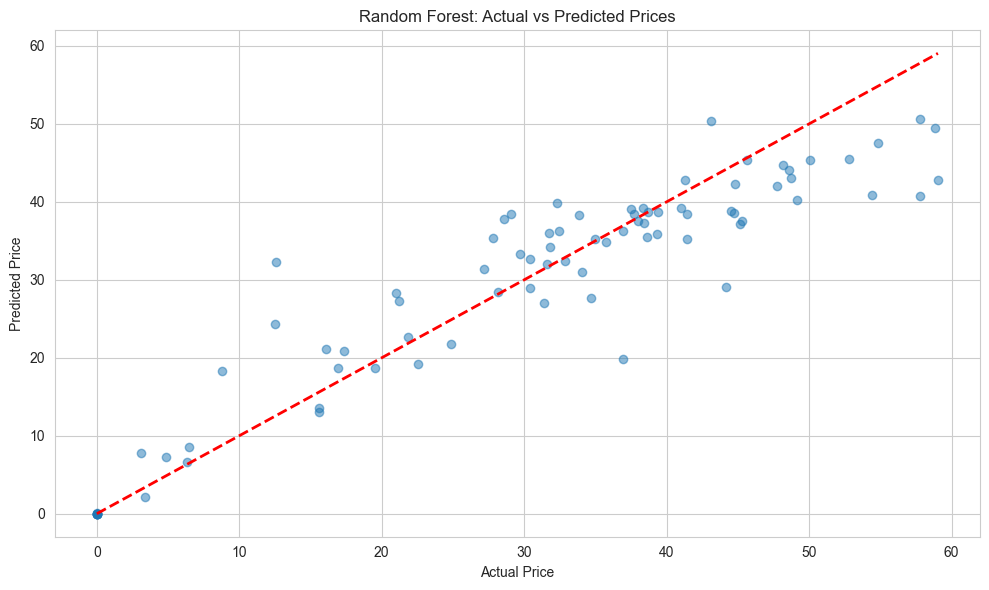

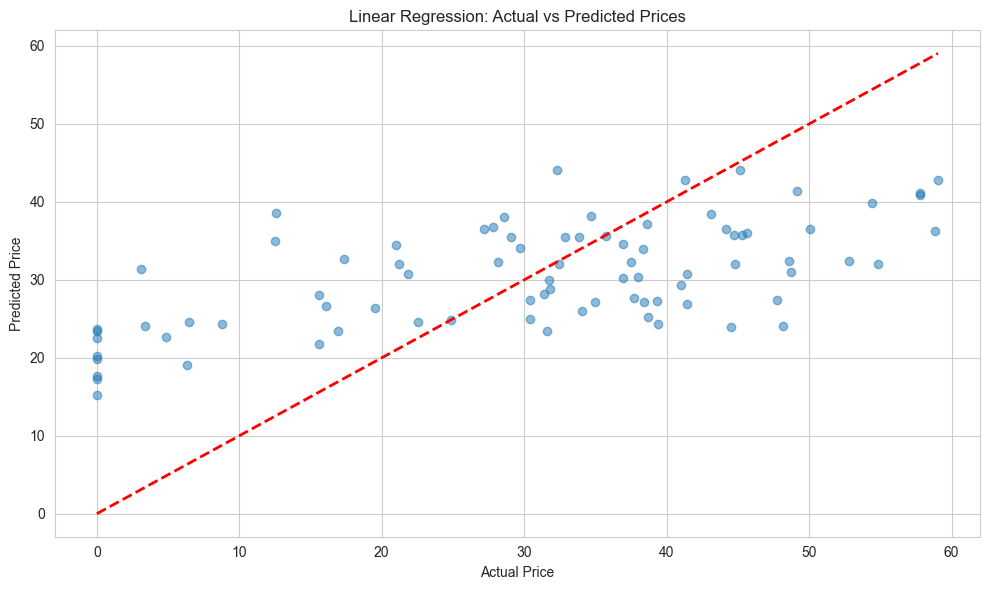

In [169]:
# Plot results for both models
plot_predictions(y_test, rf_predictions, "Random Forest")
plot_predictions(y_test, lr_predictions, "Linear Regression")

## importance plot for Random Forest

In [171]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)


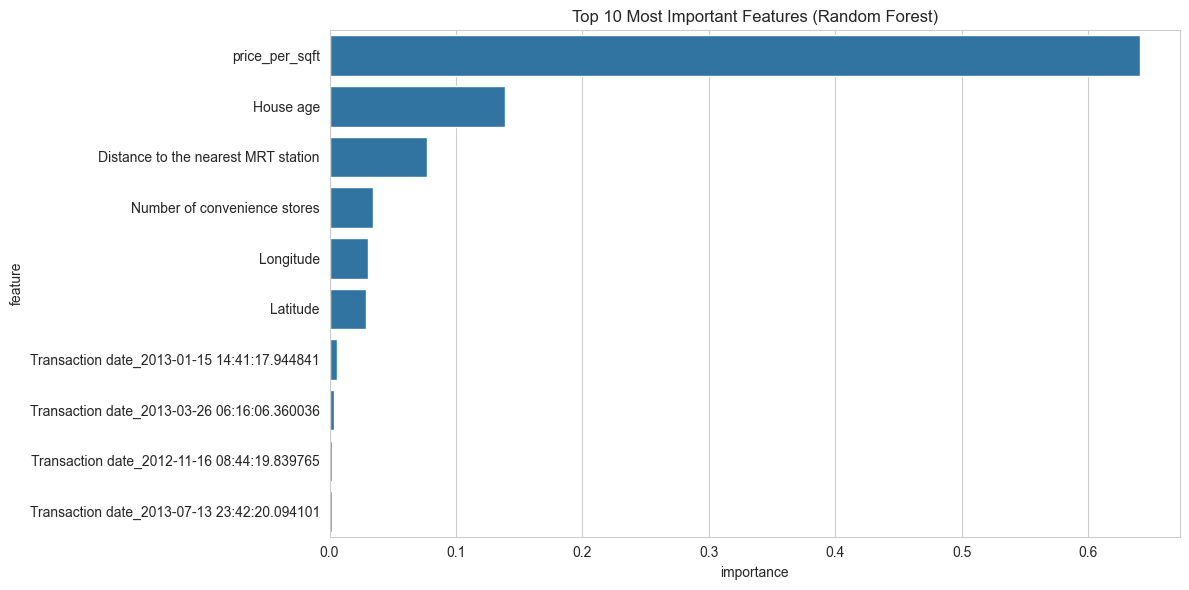

In [172]:
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.tight_layout()
plt.show()

In [173]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


In [174]:
def predict_house_price(features_dict, model, scaler, feature_columns):
    # Create DataFrame with the same columns as training data
    df_pred = pd.DataFrame(columns=feature_columns)
    df_pred.loc[0] = 0  # Initialize with zeros
    
    
    for feature, value in features_dict.items():
        if feature in df_pred.columns:
            df_pred[feature] = value
    
    # Scale features
    scaled_features = scaler.transform(df_pred)
    
    # Make prediction
    prediction = model.predict(scaled_features)[0]
    return prediction

# Example: Make a prediction for a new house
sample_house = {
    'House age': 10, 
    'Distance to the nearest MRT station': 500,  
    'Number of convenience stores': 5,  
    'Latitude': 25.03,  
    'Longitude': 121.53 
}

# Get predictions from both models
rf_price = predict_house_price(sample_house, rf_model, scaler, X.columns)
lr_price = predict_house_price(sample_house, lr_model, scaler, X.columns)

print("Sample House Details:")
for key, value in sample_house.items():
    print(f"{key}: {value}")

print(f"\nRandom Forest Predicted Price: ${rf_price:,.2f}")
print(f"Linear Regression Predicted Price: ${lr_price:,.2f}")

Sample House Details:
House age: 10
Distance to the nearest MRT station: 500
Number of convenience stores: 5
Latitude: 25.03
Longitude: 121.53

Random Forest Predicted Price: $35.96
Linear Regression Predicted Price: $-2,117.12
